In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import random
import itertools
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from scipy.special import expit
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix, log_loss, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataframes = []
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2014.csv')
dataframes.append(df1)
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2015.csv')
dataframes.append(df2)
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2016.csv')
dataframes.append(df3)
df4 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2017.csv')
dataframes.append(df4)
df5 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2018.csv')
dataframes.append(df5)
df6 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2019.csv')
dataframes.append(df6)
df7 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/climate_2020.csv')
dataframes.append(df7)
df8 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2014.csv')
dataframes.append(df8)
df9 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2015.csv')
dataframes.append(df9)
df10 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2016.csv')
dataframes.append(df10)
df11 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2017.csv')
dataframes.append(df11)
df12 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2018.csv')
dataframes.append(df12)
df13 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2019.csv')
dataframes.append(df13)
df14 = pd.read_csv('/content/drive/MyDrive/Datasets/Final Year Project/SK_climate_2020.csv')
dataframes.append(df14)

df = pd.concat(dataframes, ignore_index=True)
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.94,43.17,HAMILTON A,6153193,2014-01-01,2014,1,1,NaN,-8.0,...,1.0,NaN,1.0,NaN,6.0,NaN,4.0,NaN,43,NaN
1,-79.94,43.17,HAMILTON A,6153193,2014-01-02,2014,1,2,NaN,-15.1,...,6.4,NaN,6.8,NaN,9.0,NaN,2.0,NaN,52,NaN
2,-79.94,43.17,HAMILTON A,6153193,2014-01-03,2014,1,3,NaN,-9.6,...,0.0,T,0.0,T,12.0,NaN,22.0,NaN,50,NaN
3,-79.94,43.17,HAMILTON A,6153193,2014-01-04,2014,1,4,NaN,-0.5,...,0.0,T,0.0,T,12.0,NaN,22.0,NaN,67,NaN
4,-79.94,43.17,HAMILTON A,6153193,2014-01-05,2014,1,5,NaN,0.1,...,3.6,NaN,10.0,NaN,11.0,NaN,5.0,NaN,44,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              5114 non-null   float64
 1   Latitude (y)               5114 non-null   float64
 2   Station Name               5114 non-null   object 
 3   Climate ID                 5114 non-null   int64  
 4   Date/Time                  5114 non-null   object 
 5   Year                       5114 non-null   int64  
 6   Month                      5114 non-null   int64  
 7   Day                        5114 non-null   int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              5049 non-null   float64
 10  Max Temp Flag              75 non-null     object 
 11  Min Temp (°C)              5066 non-null   float64
 12  Min Temp Flag              76 non-null     object 
 13  Mean Temp (°C)             5046 non-null   float

In [ ]:
columns_to_drop = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Data Quality','Max Temp Flag', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag','Cool Deg Days (°C)', 'Cool Deg Days Flag','Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust Flag','Spd of Max Gust Flag']

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2014,1,1,-8.0,-15.1,1.0,6.0,4.0,43
1,2014,1,2,-15.1,-19.7,6.8,9.0,2.0,52
2,2014,1,3,-9.6,-21.8,0.0,12.0,22.0,50
3,2014,1,4,-0.5,-9.6,0.0,12.0,22.0,67
4,2014,1,5,0.1,-2.6,10.0,11.0,5.0,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5114 non-null   int64  
 1   Month                      5114 non-null   int64  
 2   Day                        5114 non-null   int64  
 3   Max Temp (°C)              5049 non-null   float64
 4   Min Temp (°C)              5066 non-null   float64
 5   Total Precip (mm)          5052 non-null   float64
 6   Snow on Grnd (cm)          1757 non-null   float64
 7   Dir of Max Gust (10s deg)  3966 non-null   float64
 8   Spd of Max Gust (km/h)     4699 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 359.7+ KB


In [ ]:
df.head()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2014,1,1,-8.0,-15.1,1.0,6.0,4.0,43
1,2014,1,2,-15.1,-19.7,6.8,9.0,2.0,52
2,2014,1,3,-9.6,-21.8,0.0,12.0,22.0,50
3,2014,1,4,-0.5,-9.6,0.0,12.0,22.0,67
4,2014,1,5,0.1,-2.6,10.0,11.0,5.0,44


In [ ]:
non_numeric = df[pd.to_numeric(df['Total Precip (mm)'], errors='coerce').isna()]
print(non_numeric['Total Precip (mm)'].size)

62


In [ ]:
df['Total Precip (mm)'] = df['Total Precip (mm)'].fillna(df['Total Precip (mm)'].mean())

In [ ]:
non_numeric = df[pd.to_numeric(df['Min Temp (°C)'], errors='coerce').isna()]
print(non_numeric['Min Temp (°C)'].size)

48


In [ ]:
df['Min Temp (°C)'] = df['Min Temp (°C)'].fillna(df['Min Temp (°C)'].mean())

In [ ]:
non_numeric = df[pd.to_numeric(df['Snow on Grnd (cm)'], errors='coerce').isna()]
print(non_numeric['Snow on Grnd (cm)'].size)

3357


In [ ]:
df['Snow on Grnd (cm)'] = df['Snow on Grnd (cm)'].fillna(df['Snow on Grnd (cm)'].mean())

In [ ]:
non_numeric = df[pd.to_numeric(df['Spd of Max Gust (km/h)'], errors='coerce').isna()]
print(non_numeric['Spd of Max Gust (km/h)'].size)

1147


In [ ]:
df['Spd of Max Gust (km/h)'] = df['Spd of Max Gust (km/h)'].apply(lambda x: 31 - random.randint(1,9) if isinstance(x, str) and x.startswith('<') else x)

In [ ]:
non_numeric = df[pd.to_numeric(df['Spd of Max Gust (km/h)'], errors='coerce').isna()]
print(non_numeric['Spd of Max Gust (km/h)'].size)

415


In [ ]:
df['Spd of Max Gust (km/h)'] = pd.to_numeric(df['Spd of Max Gust (km/h)'], errors='coerce')
df['Spd of Max Gust (km/h)'] = df['Spd of Max Gust (km/h)'].fillna(df['Spd of Max Gust (km/h)'].mean())

In [ ]:
def calculate_wind_chill(temp, wind_speed):
    if wind_speed > 4.8 and temp <= 10:
        return 13.12 + 0.6215 * temp - 11.37 * (wind_speed ** 0.16) + 0.3965 * temp * (wind_speed ** 0.16)
    return temp

def add_icing_features(data):
    data = data.copy()

    data['Freezing Risk'] = (data['Min Temp (°C)'] <= 0).astype(int)

    data['Rain-to-Snow Ratio'] = data['Total Precip (mm)'] / (data['Snow on Grnd (cm)'] + 1)

    data['Wind Chill'] = data.apply(lambda row: calculate_wind_chill(row['Min Temp (°C)'], row['Spd of Max Gust (km/h)']), axis=1)

    data['Gust Impact'] = data['Spd of Max Gust (km/h)'] * data['Snow on Grnd (cm)']

    data['Icing Probability'] = round(expit(0.1 * (np.abs(data['Min Temp (°C)']) + data['Snow on Grnd (cm)'] - data['Total Precip (mm)'] + data['Spd of Max Gust (km/h)']) - 5), 2)

    return data

In [ ]:
df = add_icing_features(df)

In [ ]:
df.head()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),Freezing Risk,Rain-to-Snow Ratio,Wind Chill,Gust Impact,Icing Probability
0,2014,1,1,-8.0,-15.1,1.0,6.0,4.0,43.0,1,0.142857,-27.948166,258.0,0.79
1,2014,1,2,-15.1,-19.7,6.8,9.0,2.0,52.0,1,0.680000,-35.217375,468.0,0.92
2,2014,1,3,-9.6,-21.8,0.0,12.0,22.0,50.0,1,0.000000,-37.853767,600.0,0.97
3,2014,1,4,-0.5,-9.6,0.0,12.0,22.0,67.0,1,0.000000,-22.586384,804.0,0.98
4,2014,1,5,0.1,-2.6,10.0,11.0,5.0,44.0,1,0.833333,-11.215759,484.0,0.44


In [ ]:
df['icing_risk'] = (df['Icing Probability'] > 0.50).astype(int)

In [ ]:
df['icing_risk'].value_counts()

,count
icing_risk,
1,3197
0,1917


<Axes: >

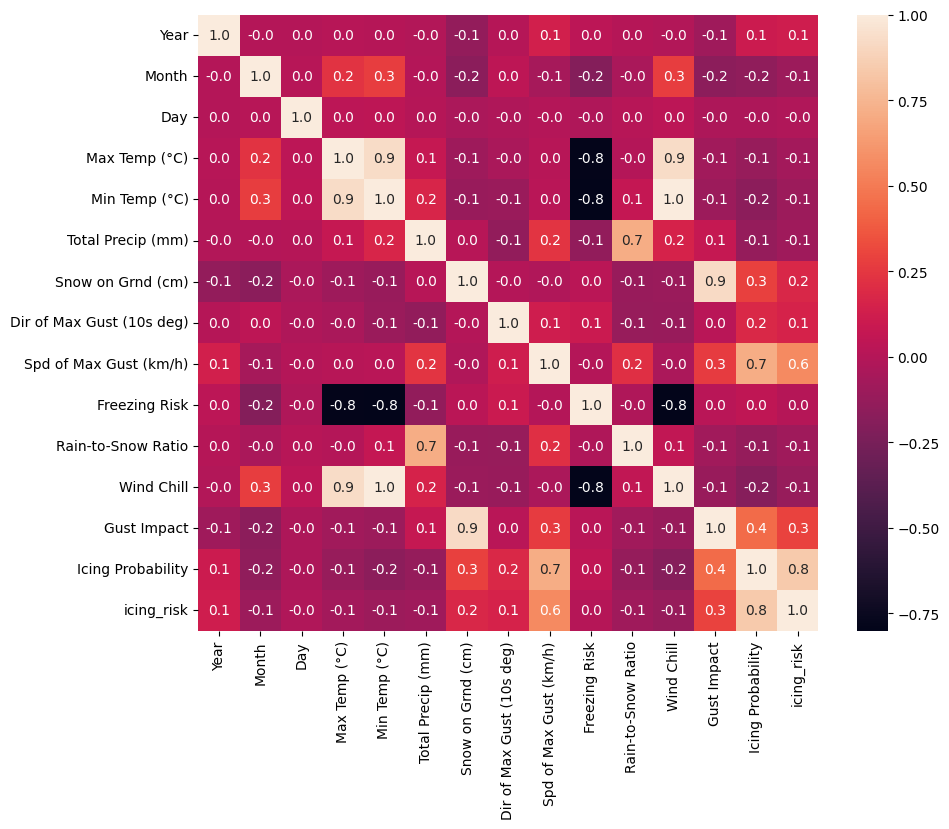

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".1f", ax=ax)

In [ ]:
df.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),Freezing Risk,Rain-to-Snow Ratio,Wind Chill,Gust Impact,Icing Probability,icing_risk
count,5114.000000,5114.000000,5114.000000,5049.000000,5114.000000,5114.000000,5114.000000,3966.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000
mean,2017.000782,6.522487,15.730935,11.360705,-0.095736,1.706235,4.939670,21.662885,43.561609,0.480250,0.440768,-7.056392,214.076285,0.597108,0.625147
std,2.000391,3.449162,8.801501,13.175405,11.748674,4.876937,4.914358,9.615565,13.083006,0.499659,1.642555,16.454416,225.756982,0.249619,0.484132
min,2014.000000,1.000000,1.000000,-29.000000,-42.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,-64.242133,0.000000,0.020000,0.000000
25%,2015.000000,4.000000,8.000000,1.400000,-6.900000,0.000000,4.939670,14.000000,34.000000,0.000000,0.000000,-16.889049,123.491747,0.400000,0.000000
50%,2017.000000,7.000000,16.000000,12.400000,0.550000,0.000000,4.939670,24.000000,43.000000,0.000000,0.000000,-6.910226,192.647126,0.610000,1.000000
75%,2019.000000,10.000000,23.000000,23.000000,9.400000,0.800000,4.939670,30.000000,50.000000,1.000000,0.168360,5.185300,246.983495,0.810000,1.000000
max,2020.000000,12.000000,31.000000,41.300000,22.900000,79.900000,50.000000,36.000000,126.000000,1.000000,51.000000,22.900000,3243.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5114 non-null   int64  
 1   Month                      5114 non-null   int64  
 2   Day                        5114 non-null   int64  
 3   Max Temp (°C)              5049 non-null   float64
 4   Min Temp (°C)              5114 non-null   float64
 5   Total Precip (mm)          5114 non-null   float64
 6   Snow on Grnd (cm)          5114 non-null   float64
 7   Dir of Max Gust (10s deg)  3966 non-null   float64
 8   Spd of Max Gust (km/h)     5114 non-null   float64
 9   Freezing Risk              5114 non-null   int64  
 10  Rain-to-Snow Ratio         5114 non-null   float64
 11  Wind Chill                 5114 non-null   float64
 12  Gust Impact                5114 non-null   float64
 13  Icing Probability          5114 non-null   float

<Axes: xlabel='Icing Probability', ylabel='Count'>

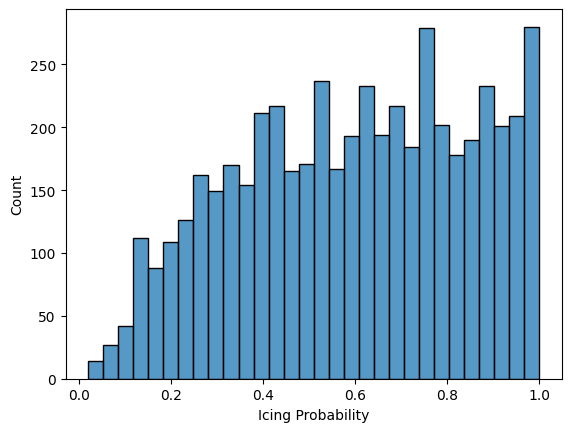

In [ ]:
sns.histplot(data=df, x='Icing Probability', bins=30)

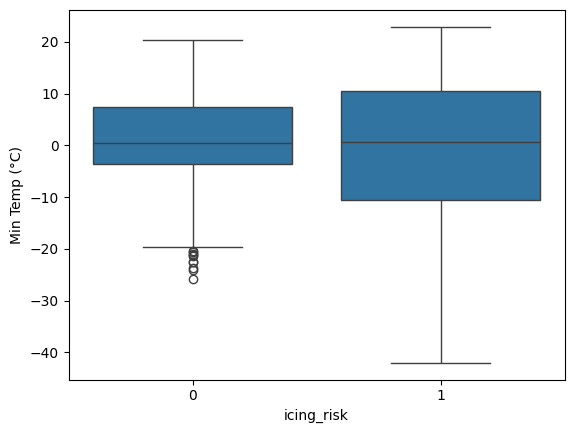

In [ ]:
# plt.figure(figsize=(10, 6))
sns.boxplot(x='icing_risk', y='Min Temp (°C)', data=df)
plt.show()

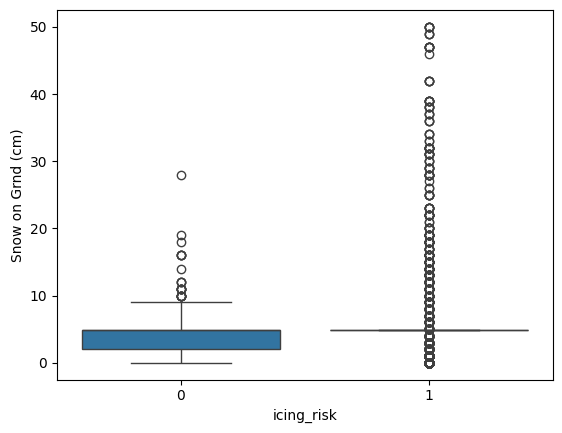

In [ ]:
sns.boxplot(x='icing_risk', y='Snow on Grnd (cm)', data=df)
plt.show()

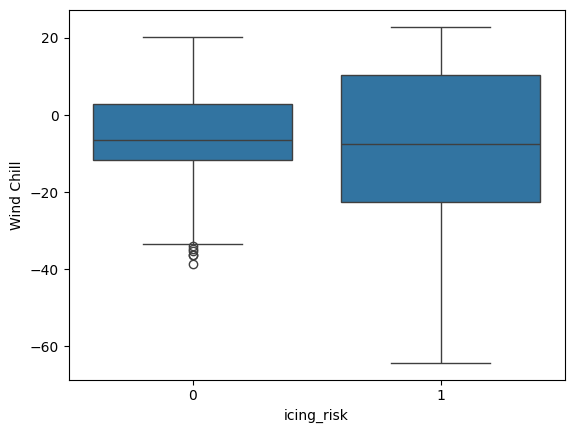

In [ ]:
sns.boxplot(x='icing_risk', y='Wind Chill', data=df)
plt.show()

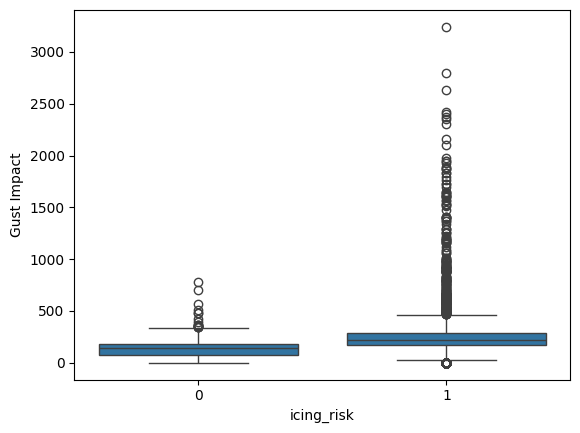

In [ ]:
sns.boxplot(x='icing_risk', y='Gust Impact', data=df)
plt.show()

In [ ]:
X = df[['Min Temp (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Wind Chill', 'Gust Impact']]
y = df['icing_risk']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Min Temp (°C)      5114 non-null   float64
 1   Total Precip (mm)  5114 non-null   float64
 2   Snow on Grnd (cm)  5114 non-null   float64
 3   Wind Chill         5114 non-null   float64
 4   Gust Impact        5114 non-null   float64
dtypes: float64(5)
memory usage: 199.9 KB


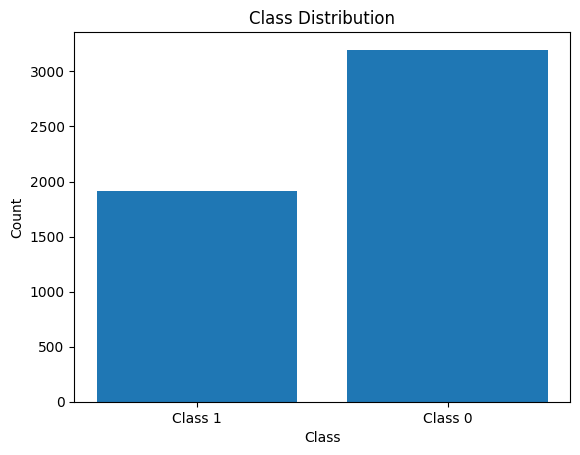

In [ ]:
class_count = y.value_counts()
plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_count.index, ['Class 0', 'Class 1'])
plt.show()

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4091, 5)

In [ ]:
y_train.shape

(4091,)

# RandomForest

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_rf = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Train model
model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)

In [ ]:
# Evaluate model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       381
           1       0.97      0.96      0.97       642

    accuracy                           0.96      1023
   macro avg       0.96      0.96      0.96      1023
weighted avg       0.96      0.96      0.96      1023



In [ ]:
presion, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, presion)

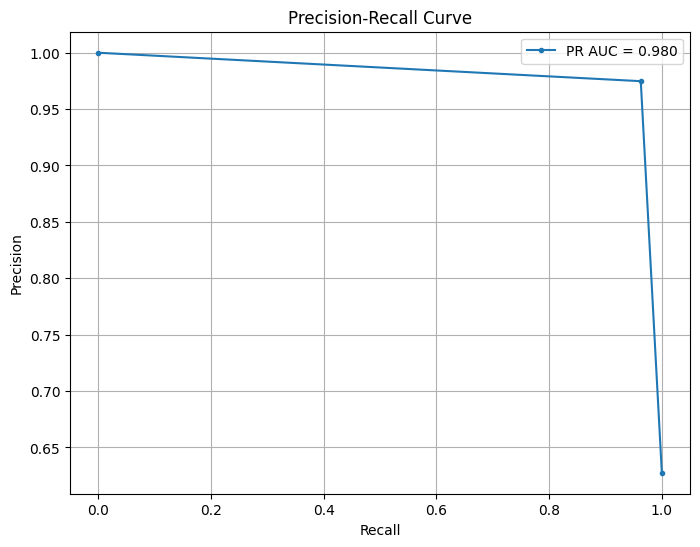

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, presion, marker='.', label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

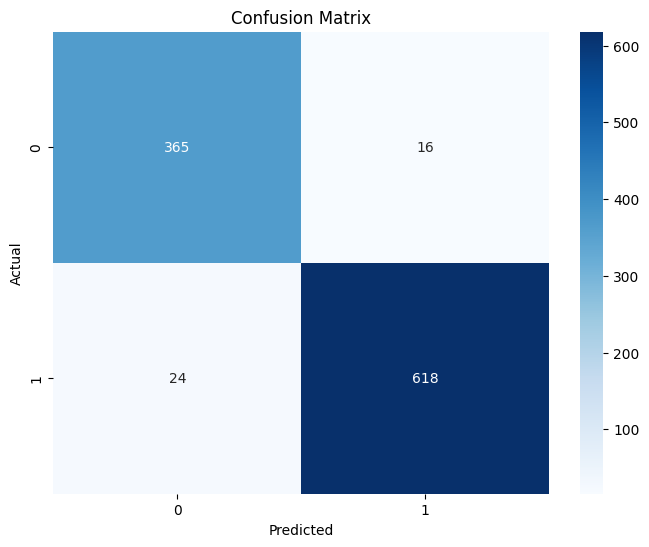

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['0', '1']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Accident Risk Analysis**

In [ ]:
df_acc = pd.read_csv("/content/drive/MyDrive/Datasets/Final Year Project/US_Accidents.csv")
df_acc.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [ ]:
df_acc.drop(columns= ['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat',
'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
'Airport_Code', 'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction',
'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)

In [ ]:
df_acc.head()

,Severity,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2,77.0,77.0,10.0,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,45.0,43.0,10.0,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,68.0,68.0,10.0,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2,27.0,15.0,10.0,15.0,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,42.0,42.0,10.0,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_acc['Temperature(F)'] = (df_acc['Temperature(F)'] - 32) * (5/9)
df_acc['Temperature(F)'] = df_acc['Temperature(F)'].round(1)
df_acc['Wind_Chill(F)'] = (df_acc['Wind_Chill(F)'] - 32) * (5/9)
df_acc['Wind_Chill(F)'] = df_acc['Wind_Chill(F)'].round(1)
df_acc['Precipitation(in)'] = df_acc['Precipitation(in)'] * 25.4
df_acc['Precipitation(in)'] = df_acc['Precipitation(in)'].round(1)
df_acc['Wind_Speed(mph)'] = df_acc['Wind_Speed(mph)'] * 1.609
df_acc['Wind_Speed(mph)'] = df_acc['Wind_Speed(mph)'].round(1)

df_acc.rename(columns= {'Temperature(F)':'Temperature(C)', 'Precipitation(in)':'Precipitation(mm)', 'Wind_Speed(mph)':'Wind_Speed(kph)', 'Wind_Chill(F)':'Wind_Chill(C)'}, inplace=True)

In [ ]:
df_acc.head()

,Severity,Temperature(C),Wind_Chill(C),Visibility(mi),Wind_Speed(kph),Precipitation(mm),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2,25.0,25.0,10.0,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,7.2,6.1,10.0,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,20.0,20.0,10.0,20.9,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2,-2.8,-9.4,10.0,24.1,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,5.6,5.6,10.0,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_acc['Weather_Condition'] = df_acc['Weather_Condition'].apply(lambda x: 'Snow' if pd.notna(x) and 'Snow' in x else x)

In [ ]:
df_acc['Snow_on_Grd'] = np.where(df_acc['Weather_Condition'] == 'Snow', 4.4, 0)

In [ ]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           500000 non-null  int64  
 1   Temperature(C)     489534 non-null  float64
 2   Wind_Chill(C)      370983 non-null  float64
 3   Visibility(mi)     488709 non-null  float64
 4   Wind_Speed(kph)    463013 non-null  float64
 5   Precipitation(mm)  357384 non-null  float64
 6   Weather_Condition  488899 non-null  object 
 7   Amenity            500000 non-null  bool   
 8   Bump               500000 non-null  bool   
 9   Crossing           500000 non-null  bool   
 10  Give_Way           500000 non-null  bool   
 11  Junction           500000 non-null  bool   
 12  No_Exit            500000 non-null  bool   
 13  Railway            500000 non-null  bool   
 14  Roundabout         500000 non-null  bool   
 15  Station            500000 non-null  bool   
 16  St

In [ ]:
df_acc['Temperature(C)'] = df_acc['Temperature(C)'].fillna(df_acc['Temperature(C)'].mean())
df_acc['Wind_Chill(C)'] = df_acc['Wind_Chill(C)'].fillna(df_acc['Wind_Chill(C)'].mean())
df_acc['Visibility(mi)'] = df_acc['Visibility(mi)'].fillna(df_acc['Visibility(mi)'].mean())
df_acc['Wind_Speed(kph)'] = df_acc['Wind_Speed(kph)'].fillna(df_acc['Wind_Speed(kph)'].mean())
df_acc['Precipitation(mm)'] = df_acc['Precipitation(mm)'].fillna(df_acc['Precipitation(mm)'].mean())

In [ ]:
df_acc.isnull().sum()

,0
Severity,0
Temperature(C),0
Wind_Chill(C),0
Visibility(mi),0
Wind_Speed(kph),0
Precipitation(mm),0
Weather_Condition,11101
Amenity,0
Bump,0
Crossing,0


In [ ]:
def Icing_Features(data):
    data = data.copy()

    data['Freezing Risk'] = (data['Temperature(C)'] <= 0).astype(int)

    data['Rain-to-Snow Ratio'] = data['Precipitation(mm)'] / (data['Snow_on_Grd'] + 1)

    data['Gust Impact'] = data['Wind_Speed(kph)'] * data['Snow_on_Grd']

    return data

In [ ]:
df_acc = Icing_Features(df_acc)

In [ ]:
df_acc.describe()

,Severity,Temperature(C),Wind_Chill(C),Visibility(mi),Wind_Speed(kph),Precipitation(mm),Snow_on_Grd,Freezing Risk,Rain-to-Snow Ratio,Gust Impact
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2.212748,16.470145,14.572103,9.091540,12.356472,0.211907,0.090042,0.079346,0.206819,1.543341
std,0.486661,10.444579,10.696352,2.677331,8.409566,2.187382,0.622958,0.270278,2.185498,12.487062
min,1.000000,-61.000000,-47.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,10.000000,11.100000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,17.200000,14.572103,10.000000,12.356472,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,24.400000,21.700000,10.000000,16.100000,0.211907,0.000000,0.000000,0.211907,0.000000
max,4.000000,97.200000,97.200000,130.000000,1323.900000,257.300000,4.400000,1.000000,257.300000,368.280000


In [ ]:
Icing_test = df_acc[['Temperature(C)', 'Precipitation(mm)', 'Snow_on_Grd', 'Wind_Chill(C)', 'Gust Impact']].copy()
Icing_test.rename(columns={'Temperature(C)': 'Min Temp (°C)', 'Precipitation(mm)': 'Total Precip (mm)', 'Wind_Chill(C)': 'Wind Chill', 'Snow_on_Grd': 'Snow on Grnd (cm)'}, inplace=True)
Icing_pred = model.predict(Icing_test)
Icing_pred = pd.Series(Icing_pred)

In [ ]:
Icing_pred.value_counts()

,count
0,368856
1,131144


In [ ]:
df_acc['Road_Icing'] = Icing_pred

In [ ]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Severity            500000 non-null  int64  
 1   Temperature(C)      500000 non-null  float64
 2   Wind_Chill(C)       500000 non-null  float64
 3   Visibility(mi)      500000 non-null  float64
 4   Wind_Speed(kph)     500000 non-null  float64
 5   Precipitation(mm)   500000 non-null  float64
 6   Weather_Condition   488899 non-null  object 
 7   Amenity             500000 non-null  bool   
 8   Bump                500000 non-null  bool   
 9   Crossing            500000 non-null  bool   
 10  Give_Way            500000 non-null  bool   
 11  Junction            500000 non-null  bool   
 12  No_Exit             500000 non-null  bool   
 13  Railway             500000 non-null  bool   
 14  Roundabout          500000 non-null  bool   
 15  Station             500000 non-nul

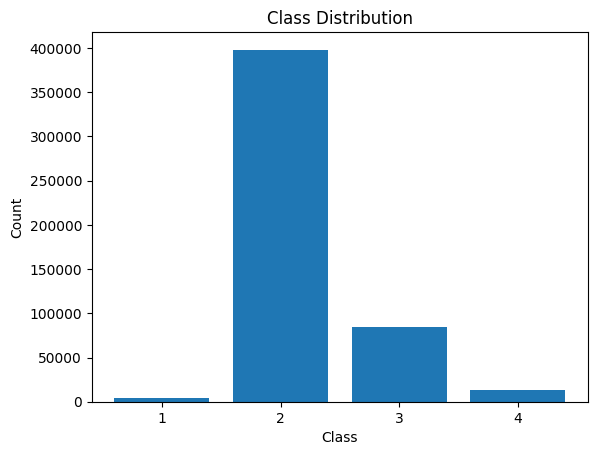

In [ ]:
class_count = df_acc['Severity'].value_counts()
plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_count.index)
plt.show()

In [ ]:
df_acc['Severity'].value_counts()

,count
Severity,
2,398142
3,84520
4,13064
1,4274


<Axes: >

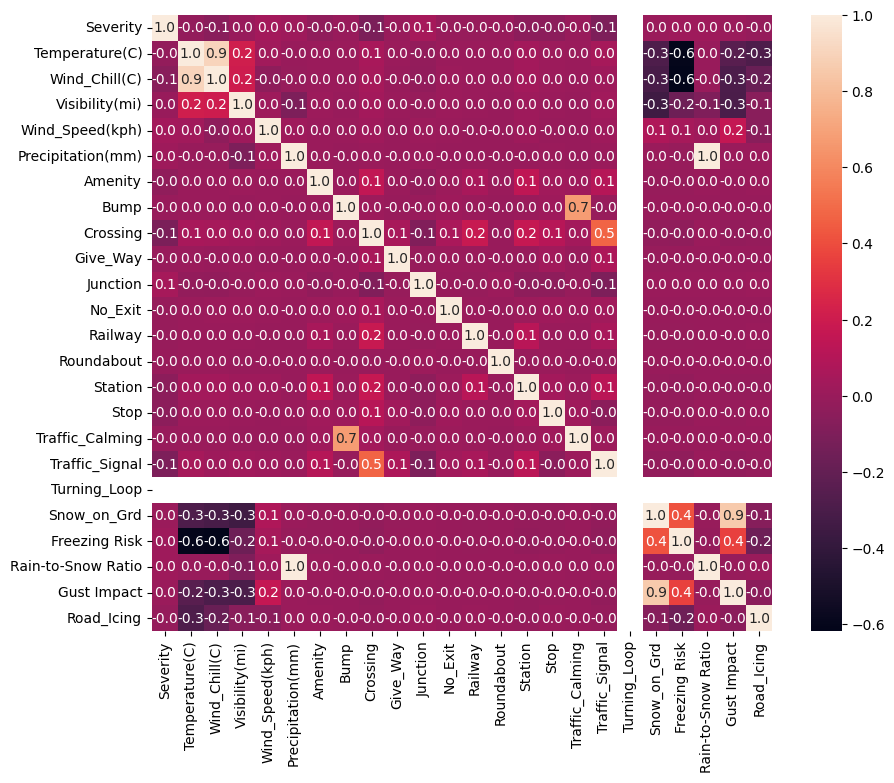

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

numeric_df = df_acc.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1f", ax=ax)

In [ ]:
df_acc = df_acc.astype({col: int for col in df_acc.select_dtypes(include=['bool']).columns})

In [ ]:
df_acc.head()

,Severity,Temperature(C),Wind_Chill(C),Visibility(mi),Wind_Speed(kph),Precipitation(mm),Weather_Condition,Amenity,Bump,Crossing,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Snow_on_Grd,Freezing Risk,Rain-to-Snow Ratio,Gust Impact,Road_Icing
0,2,25.0,25.0,10.0,8.0,0.0,Fair,0,0,0,...,0,0,0,1,0,0.0,0,0.0,0.0,0
1,2,7.2,6.1,10.0,8.0,0.0,Fair,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0.0,1
2,2,20.0,20.0,10.0,20.9,0.0,Fair,0,0,0,...,0,0,0,1,0,0.0,0,0.0,0.0,0
3,2,-2.8,-9.4,10.0,24.1,0.0,Wintry Mix,0,0,0,...,0,0,0,0,0,0.0,1,0.0,0.0,0
4,2,5.6,5.6,10.0,0.0,0.0,Fair,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0.0,0


In [ ]:
X_acc = df_acc[['Temperature(C)', 'Wind_Chill(C)', 'Visibility(mi)',
       'Wind_Speed(kph)', 'Precipitation(mm)', 'Crossing', 'Junction', 'Traffic_Signal',
       'Snow_on_Grd', 'Freezing Risk', 'Rain-to-Snow Ratio','Gust Impact', 'Road_Icing']]
y_acc = df_acc['Severity']

In [ ]:
# rus = RandomUnderSampler()
# X_resampled, y_resampled = rus.fit_resample(X_acc, y_acc)

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_acc, y_acc)

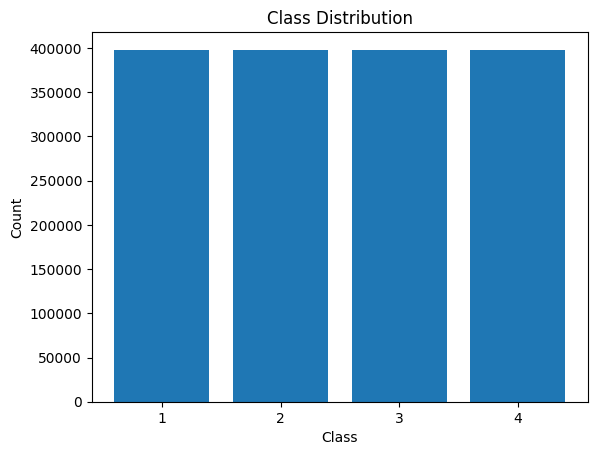

In [ ]:
class_count = y_resampled.value_counts()
plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_count.index)
plt.show()

In [ ]:
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Using XGBoost

In [ ]:
# param_dict = {
#     "max_depth": [1, 3],
#     "learning_rate": [0.001, 0.01],
#     "n_estimators": [100, 200],
#     "subsample": [0.7, 0.8],
#     "colsample_bytree": [0.7, 0.8]
# }

# xgb_acc_test = xgb.XGBClassifier(objective="multi:softprob", num_class=4, tree_method="hist")

In [ ]:
# grid_search = RandomizedSearchCV(
#     estimator=xgb_acc_test,
#     param_distributions=param_dict,
#     scoring="accuracy",
#     n_iter=20,
#     cv=3,
#     verbose=1,
#     n_jobs=2
# )

# grid_search.fit(X_acc_train, y_acc_train)

# # Print the best parameters
# print("Best parameters:", grid_search.best_params_)
# print("Best accuracy:", grid_search.best_score_)

In [ ]:
best_params_acc = {"max_depth": 5,
                   "learning_rate": 0.2,
                   "subsample": 0.8,
                   "colsample_bytree": 0.7,
                   "n-estimators":100}

In [ ]:
y_acc_train = y_acc_train - 1
y_acc_test = y_acc_test - 1

In [ ]:
xgb_clf_acc = XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    use_label_encoder=False,
    **best_params_acc
)

xgb_clf_acc.fit(X_acc_train, y_acc_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:30:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n-estimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n-estimators=100,
              n_estimators=None, n_jobs=None, num_class=4, ...)

In [ ]:
y_acc_pred_xgb = xgb_clf_acc.predict(X_acc_test)

In [ ]:
accuracy = accuracy_score(y_acc_test, y_acc_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_acc_test, y_acc_pred_xgb))

Accuracy: 0.5206

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.83      0.63     79989
           1       0.51      0.44      0.47     79129
           2       0.54      0.48      0.51     79492
           3       0.53      0.32      0.40     79904

    accuracy                           0.52    318514
   macro avg       0.52      0.52      0.50    318514
weighted avg       0.52      0.52      0.50    318514



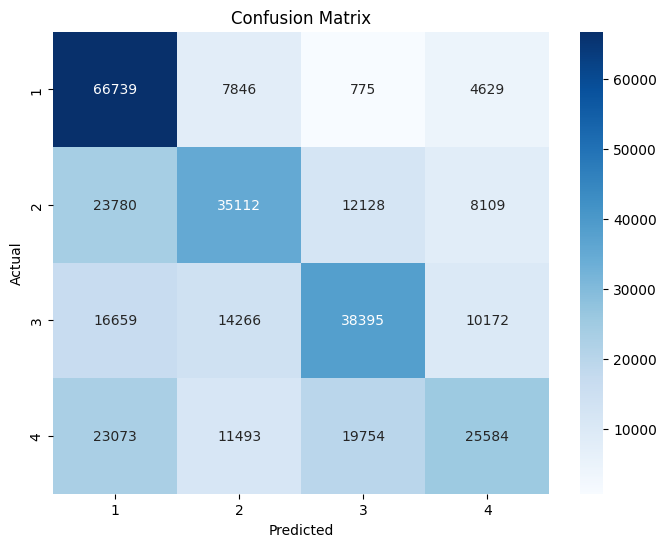

In [ ]:
cm = confusion_matrix(y_acc_test, y_acc_pred_xgb)

class_labels = ['1', '2', '3', '4']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()